Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph
from model import make_model, simulate

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="" # disable GPU
ROOT = '/data/cvfs/ah2029/datasets/gym/carracing/'

DATA_DIR = os.path.join(ROOT, 'record_from_trained_baseline')
model_path_name = os.path.join(ROOT, 'tf_vae')

beta_vae_name = 'beta5_rtd_vae.json'
z_size=32

In [5]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'baseline_vae.json'))

beta_vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, beta_vae_name))
beta_vae.load_json(os.path.join(model_path_name, beta_vae_name))

INFO:tensorflow:Model using cpu.
INFO:tensorflow:Model using cpu.


### Compare disentanglement

In [6]:
filelist = os.listdir(DATA_DIR)

In [7]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

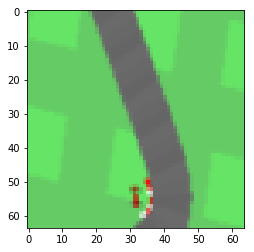

In [16]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])

In [10]:
def plot_latent_variations(frame, vae, factor=0):
    batch_z = vae.encode_mu_logvar(frame)[0]#vae.encode(frame)
    print('Latent vector z')
    print(batch_z[0]) # print out sampled z
    reconstruct = vae.decode(batch_z)
    
    plt.figure(figsize=((10, 5)))
    plt.subplot(121)
    plt.imshow(frame[0])
    plt.title('Original')
    # show reconstruction
    plt.subplot(122)
    plt.imshow(reconstruct[0])
    plt.title('Reconstruction')
    plt.show()

    print('Visualise latent factor {}, original value={:.2f}'.format(factor, batch_z[0][factor]))
    batch_z_copy = batch_z.copy()
    plt.figure(figsize=(20, 5))
    for i, value in enumerate(np.linspace(-1.5, 1.5, 10)):
        batch_z_copy[0, factor] = value
        reconstruct = vae.decode(batch_z_copy)
        # show reconstruction
        plt.subplot(1, 10, i+1)
        plt.imshow(reconstruct[0])
        plt.title('{:.2f}'.format(value))
    plt.show()

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


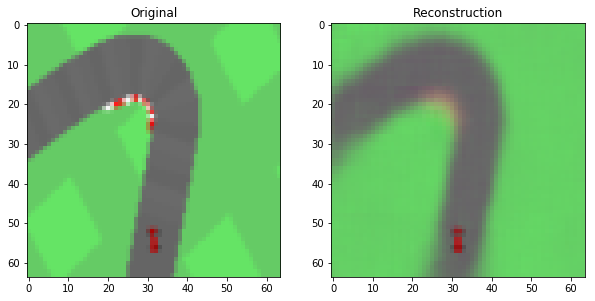

Visualise latent factor 0, original value=-0.01


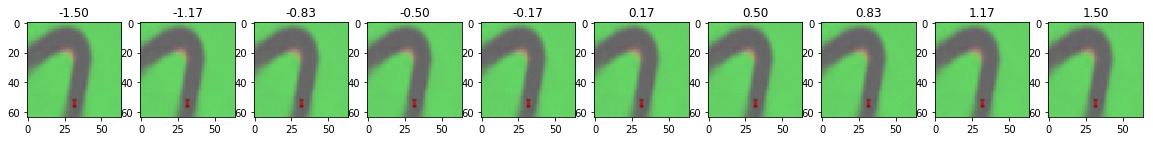

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


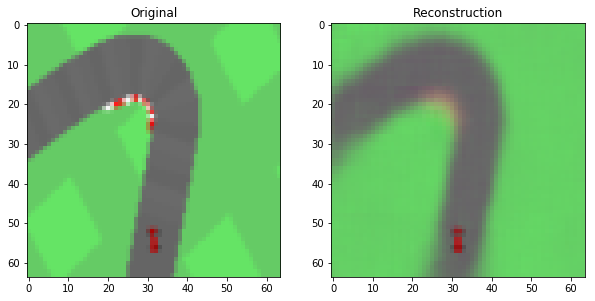

Visualise latent factor 1, original value=0.01


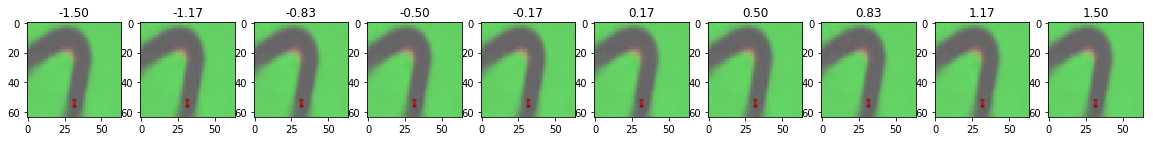

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


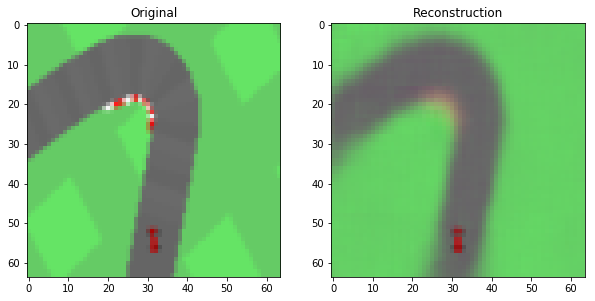

Visualise latent factor 2, original value=-0.03


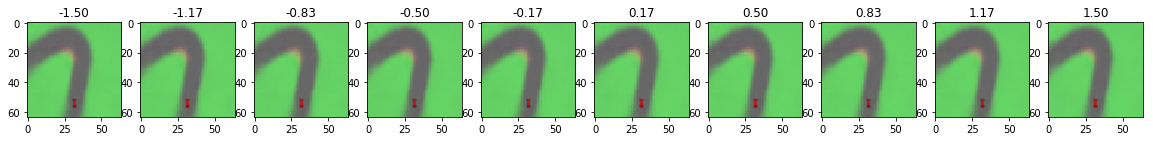

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


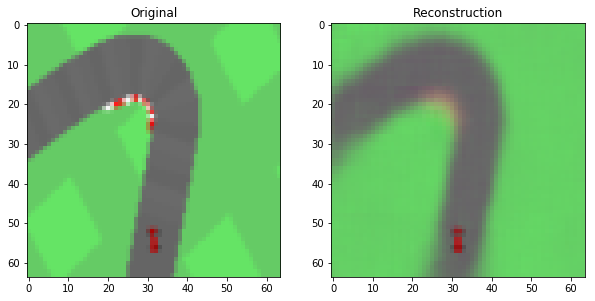

Visualise latent factor 3, original value=0.01


KeyboardInterrupt: 

In [11]:
for i in range(32):
    plot_latent_variations(frame, vae, factor=i)

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


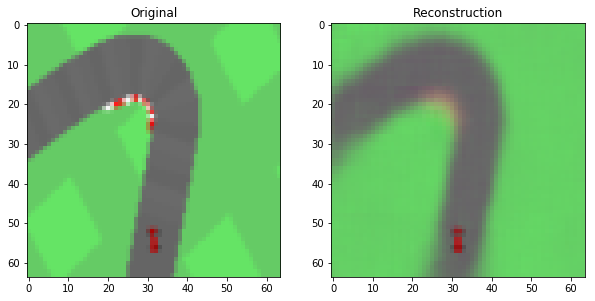

Visualise latent factor 0, original value=-0.01


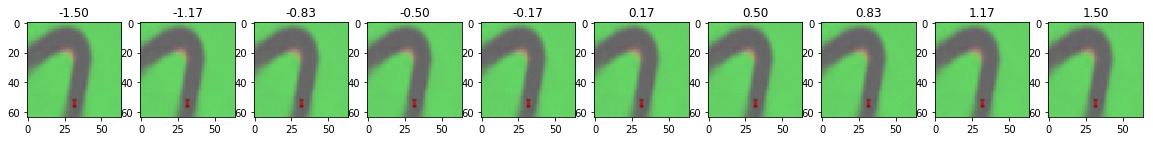

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


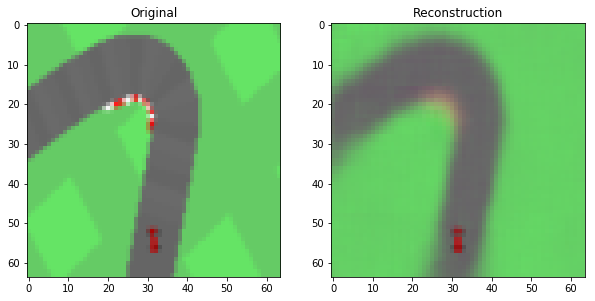

Visualise latent factor 1, original value=0.01


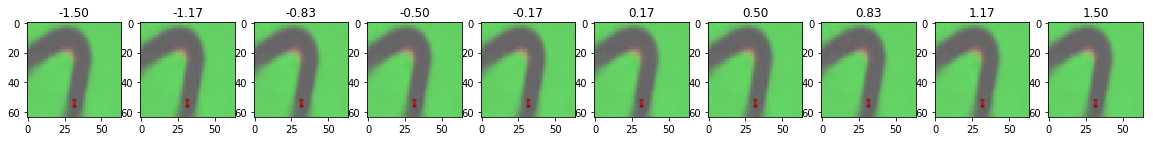

Latent vector z
[-0.0149  0.0104 -0.0277  0.0064 -0.0023 -0.0088 -0.0114 -1.6531  0.1091  0.0086  0.0054 -0.0036
 -0.0096  1.053   0.0244 -0.0137 -0.2641 -0.0072 -0.0019 -0.0042 -0.0086 -0.0091 -0.003   0.0054
  0.0079  0.0008 -0.008  -1.4787 -0.3023  0.0146  0.0078 -0.0048]


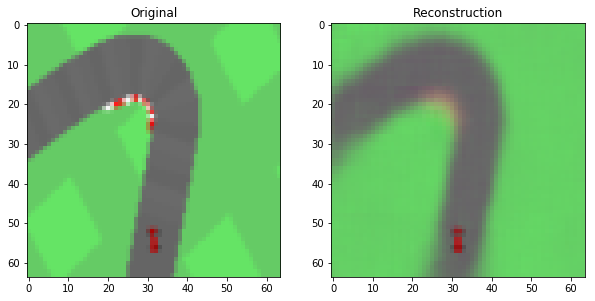

Visualise latent factor 2, original value=-0.03


KeyboardInterrupt: 

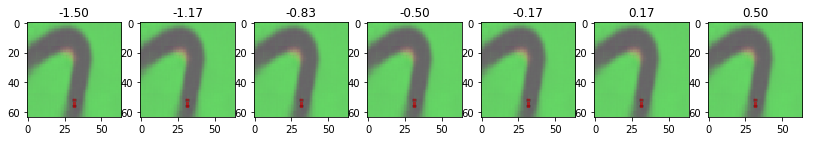

In [12]:
for i in range(32):
    plot_latent_variations(frame, beta_vae, factor=i)

## Behaviour characterisation

In [22]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]

In [4]:
model = make_model(model_name='beta5')
model.load_model('carracing.cma.vae_beta_5.0.16.40.best.json')
model.make_env()

INFO:tensorflow:Model using cpu.
model using cpu
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False
loading file /data/cvfs/ah2029/datasets/gym/carracing/log/carracing.cma.vae_beta_5.0.16.40.best.json


In [5]:
reward_list, bc_list, t_list = simulate(model,
    train_mode=1, render_mode=False, num_episode=5, novelty_search=True, seed=0, max_len=-1)

Track generation: 1143..1442 -> 299-tiles track
Track generation: 1087..1369 -> 282-tiles track
Track generation: 964..1212 -> 248-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1176..1474 -> 298-tiles track
Track generation: 1283..1608 -> 325-tiles track
Track generation: 1217..1526 -> 309-tiles track


In [6]:
model = make_model(model_name='beta5_rtd')
model.load_model('carracing.cma.beta5_rtd.1.10.test.novelty.best.json')
model.make_env()

INFO:tensorflow:Model using cpu.
model using cpu
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False
loading file /data/cvfs/ah2029/datasets/gym/carracing/log/carracing.cma.beta5_rtd.1.10.test.novelty.best.json


In [7]:
reward_list_other, bc_list_other, t_list_other = simulate(model,
    train_mode=1, render_mode=False, num_episode=1, novelty_search=True, seed=0, max_len=-1)

Track generation: 1143..1442 -> 299-tiles track


In [21]:
np.random.random_sample()

0.4238478929482502

In [31]:
np.concatenate([[1, 2, 3], []])

array([1., 2., 3.])

In [24]:
np.concatenate([coords, coords], axis=0).shape

(12, 256)

In [27]:
from collections import deque

a = deque(maxlen=10)

for i in range(20):
    a.append(i)
    print(a)

deque([0], maxlen=10)
deque([0, 1], maxlen=10)
deque([0, 1, 2], maxlen=10)
deque([0, 1, 2, 3], maxlen=10)
deque([0, 1, 2, 3, 4], maxlen=10)
deque([0, 1, 2, 3, 4, 5], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], maxlen=10)
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], maxlen=10)
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], maxlen=10)
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], maxlen=10)
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14], maxlen=10)
deque([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], maxlen=10)
deque([7, 8, 9, 10, 11, 12, 13, 14, 15, 16], maxlen=10)
deque([8, 9, 10, 11, 12, 13, 14, 15, 16, 17], maxlen=10)
deque([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], maxlen=10)
deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)


In [28]:
np.array(a)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

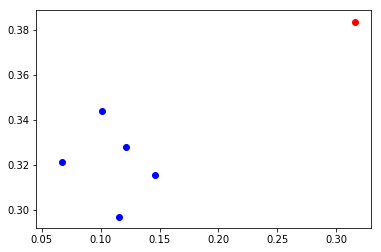

In [12]:
from sklearn.decomposition import PCA

coords = np.array(bc_list + bc_list_other)

pca = PCA(n_components=2)
pca.fit(coords)

for v in bc_list:
    new_coords = pca.transform(np.expand_dims(v, 0))
    plt.scatter(v[0], v[1], color='blue')
    
for v in bc_list_other:
    new_coords = pca.transform(np.expand_dims(v, 0))
    plt.scatter(v[0], v[1], color='red')
